In [1]:
#To plot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.animation import PillowWriter
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from scipy import interpolate
from matplotlib import gridspec
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

import seaborn as sns

In [2]:
import os
home = os.path.expanduser("~")

In [3]:
#fetches the defined dataframes from fetch_df.py and turn them into pandas dataframes
#df_sc contains the full test partitioning and df_2021 contains predictions that would have been published during 2021 

from fetch_df import sc_all

pd.df_sc = sc_all()

from fetch_df import sc_2021

pd.df_2021 = sc_2021()

pr_46_cm_ensemble_genetic_test.parquet
pr_46_cm_ensemble_genetic_test.parquet


In [4]:
df = pd.df_sc

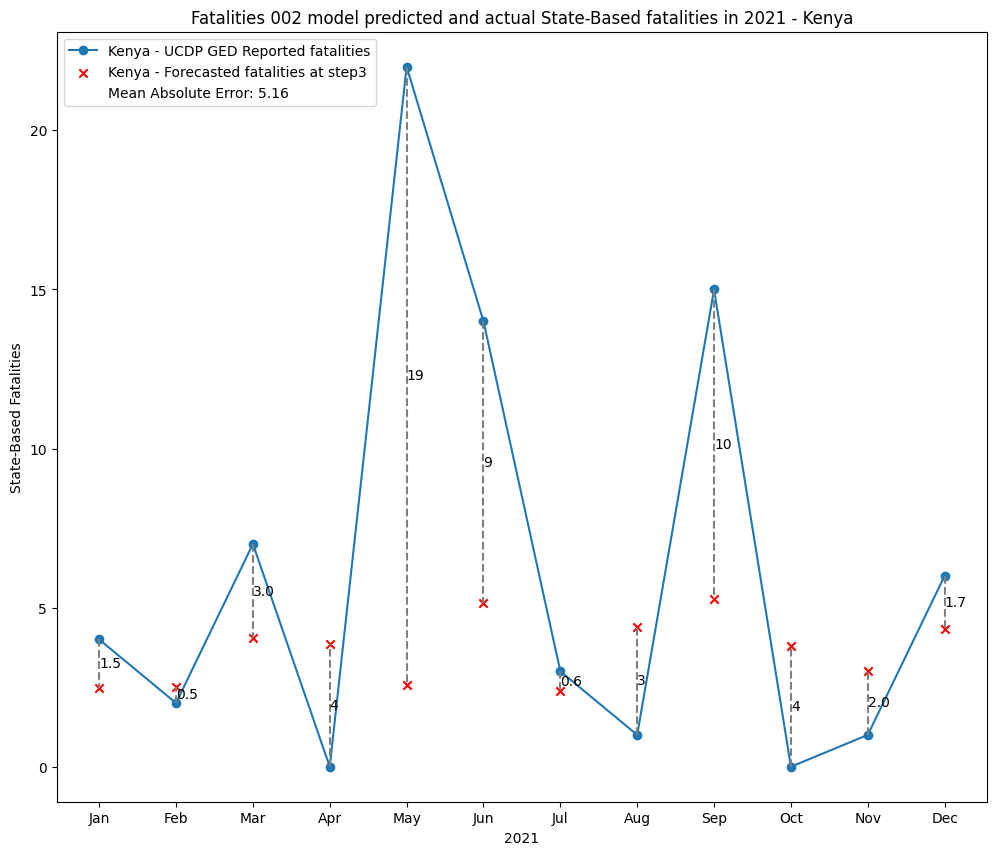

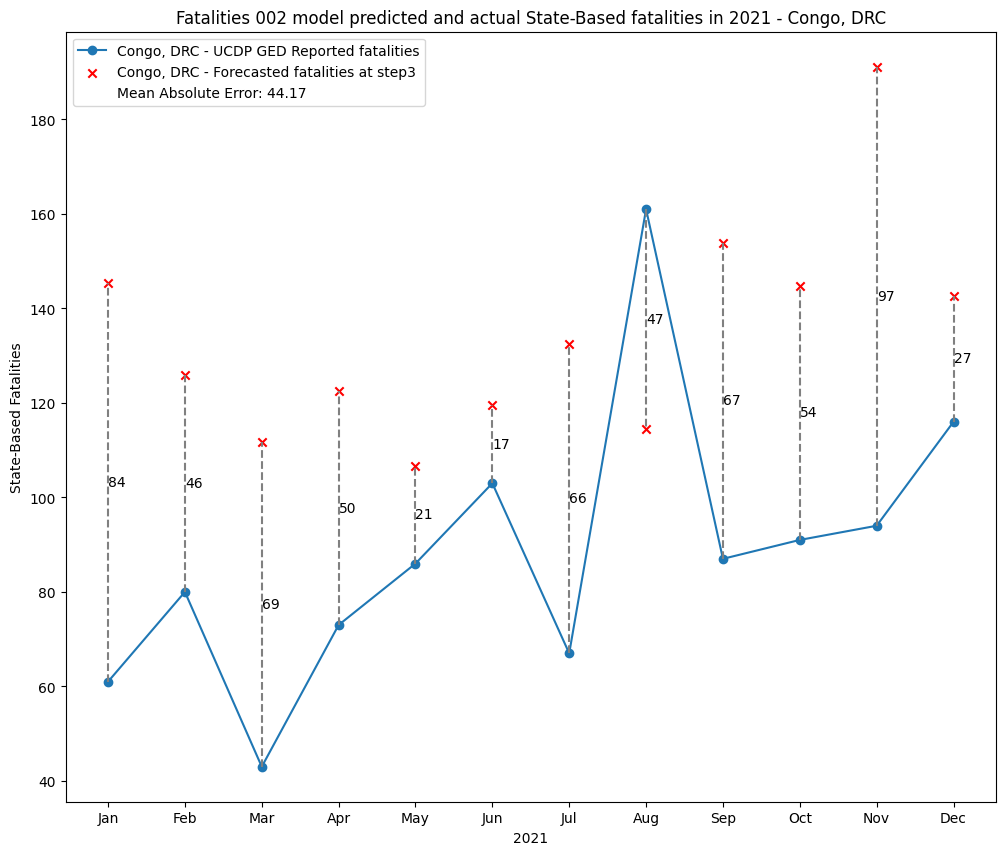

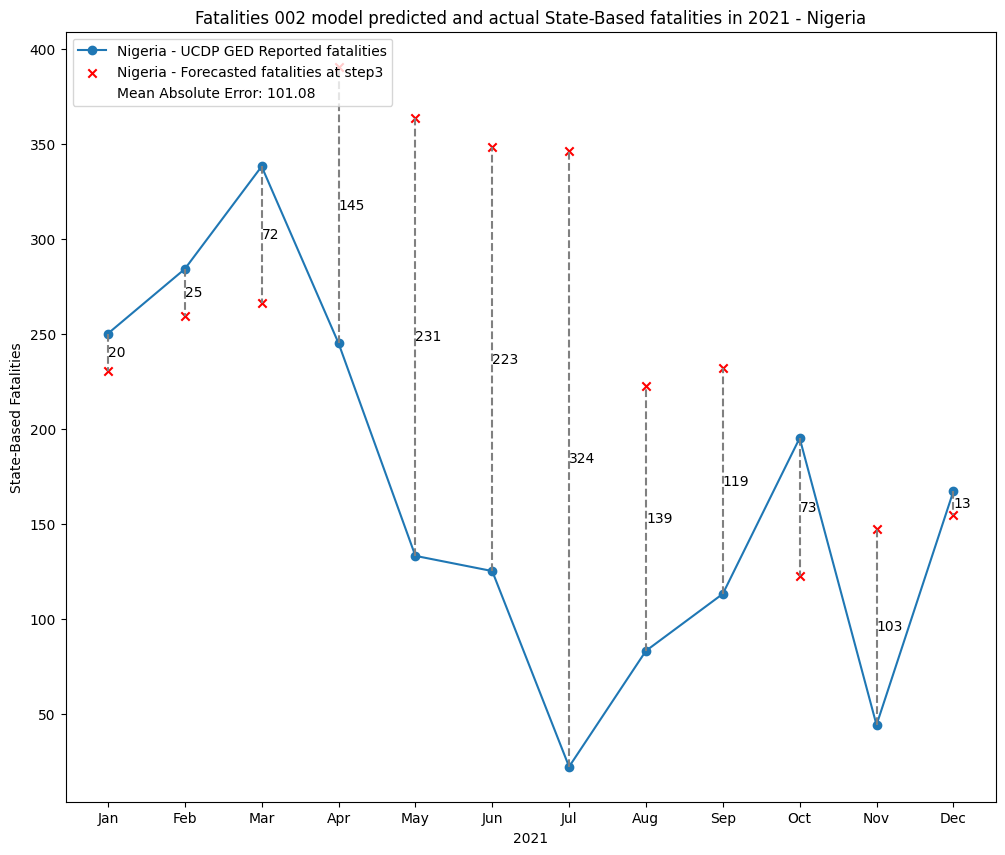

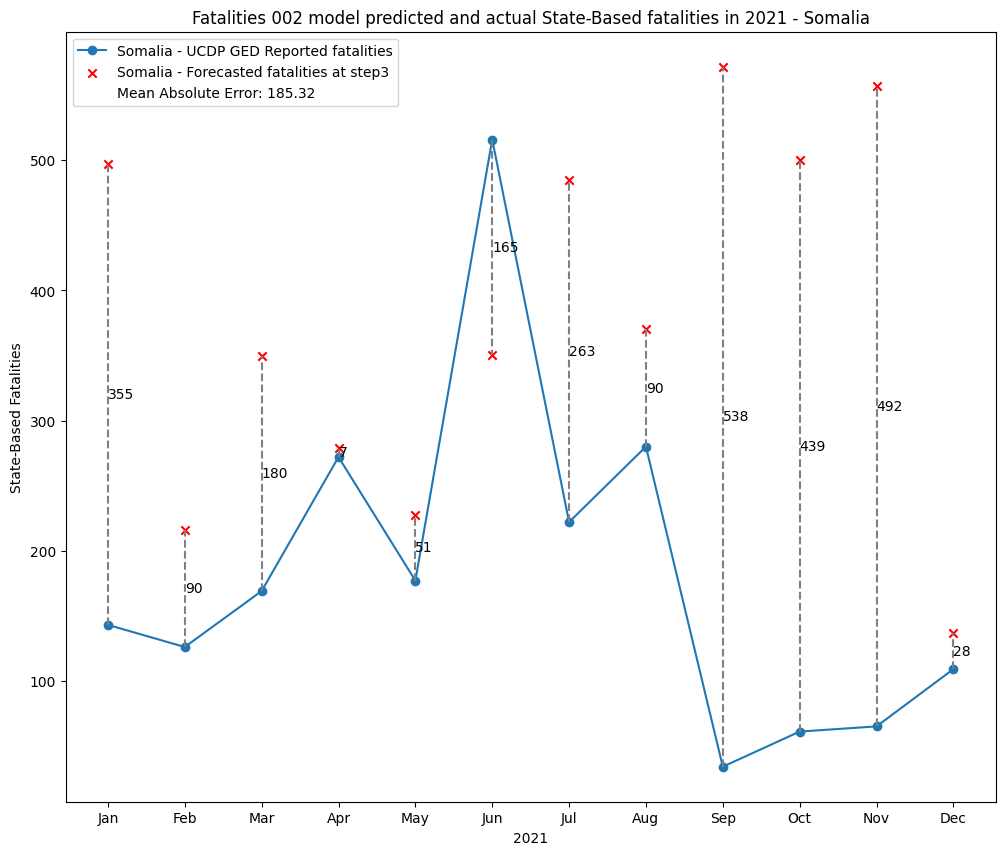

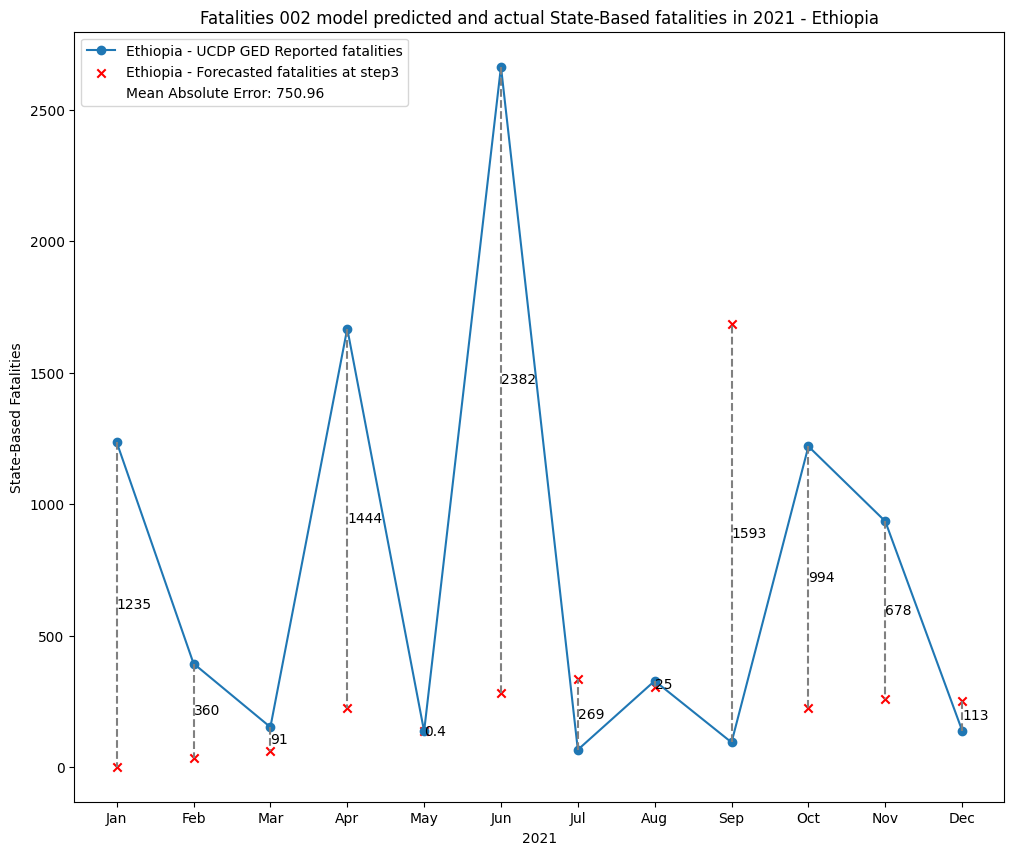

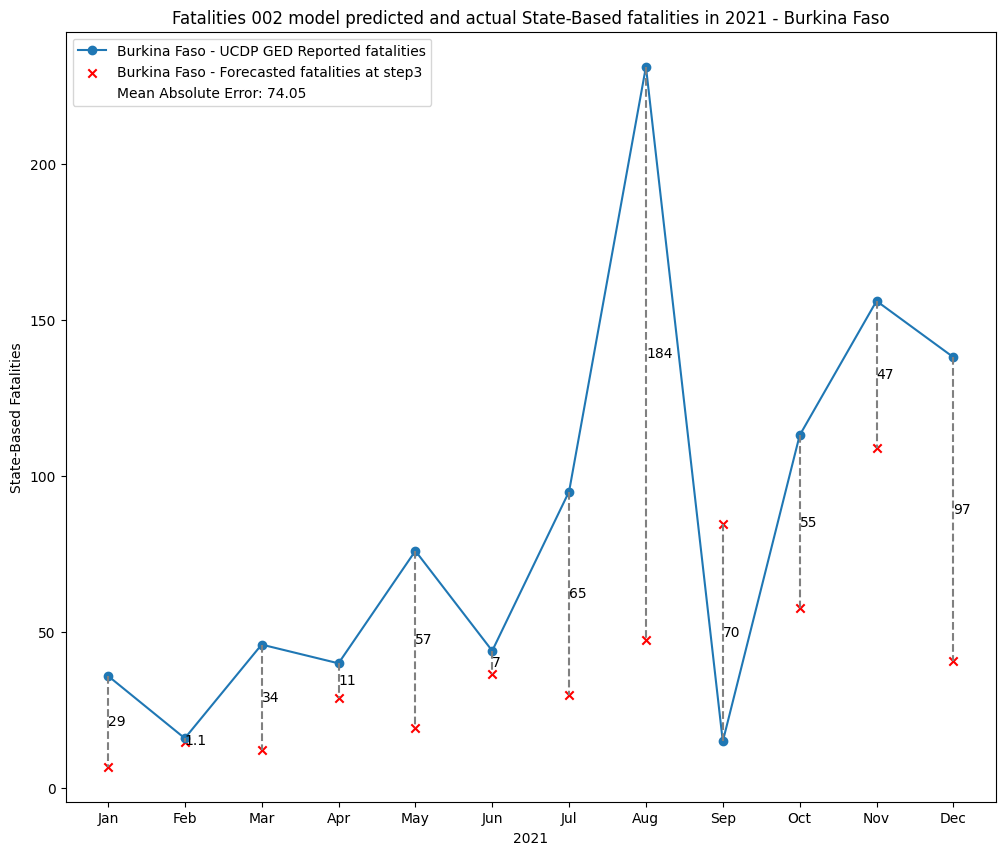

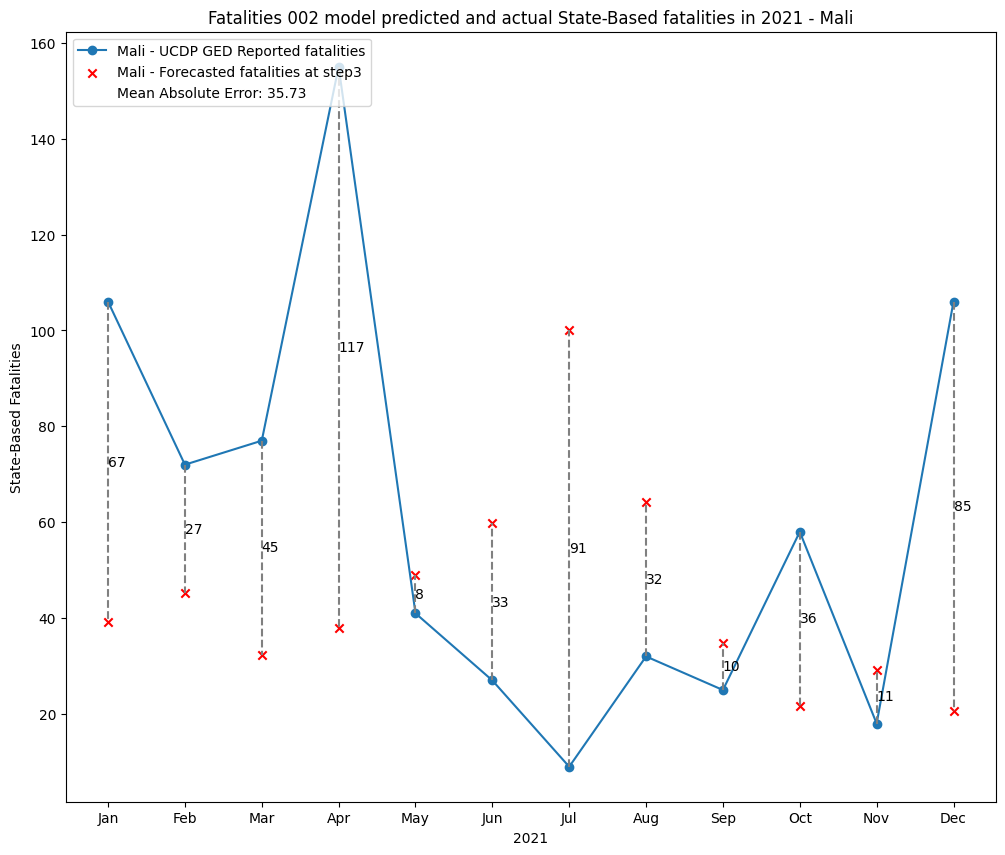

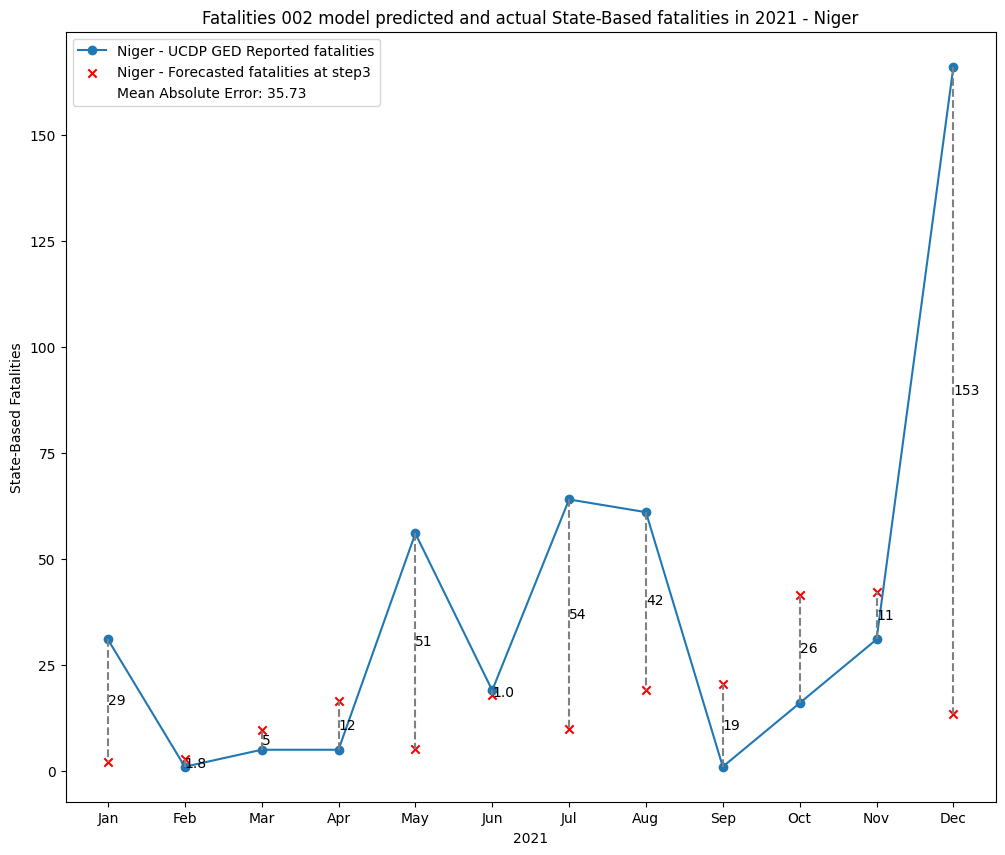

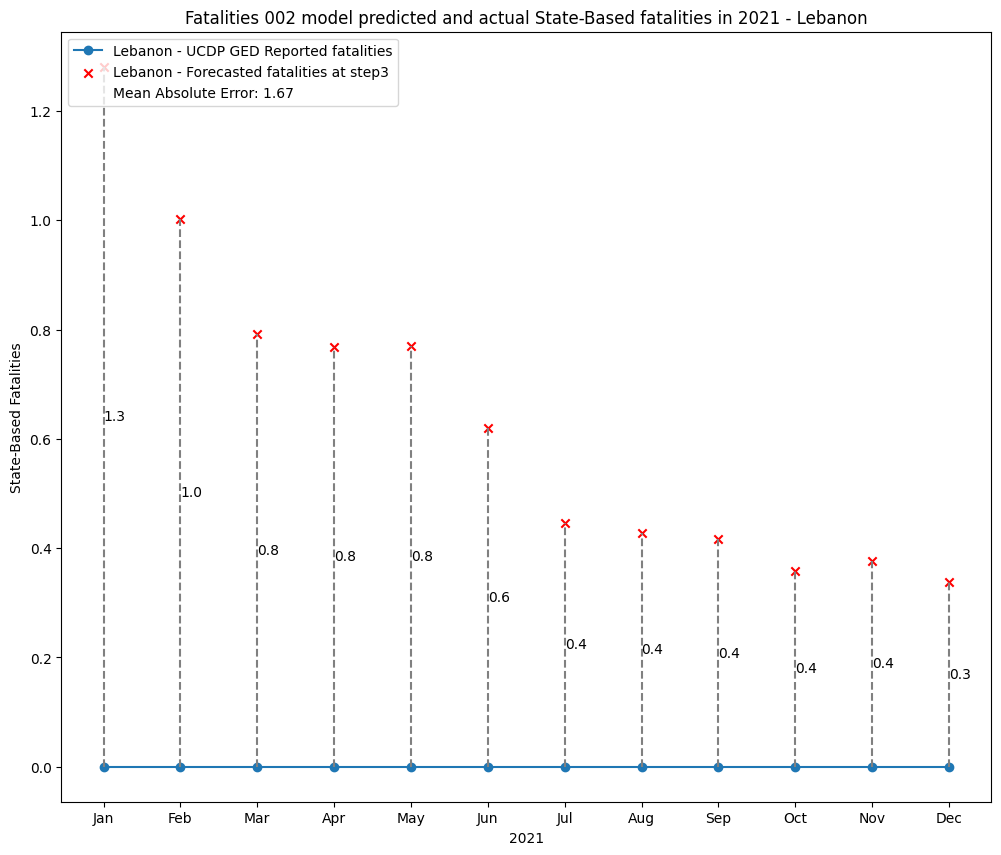

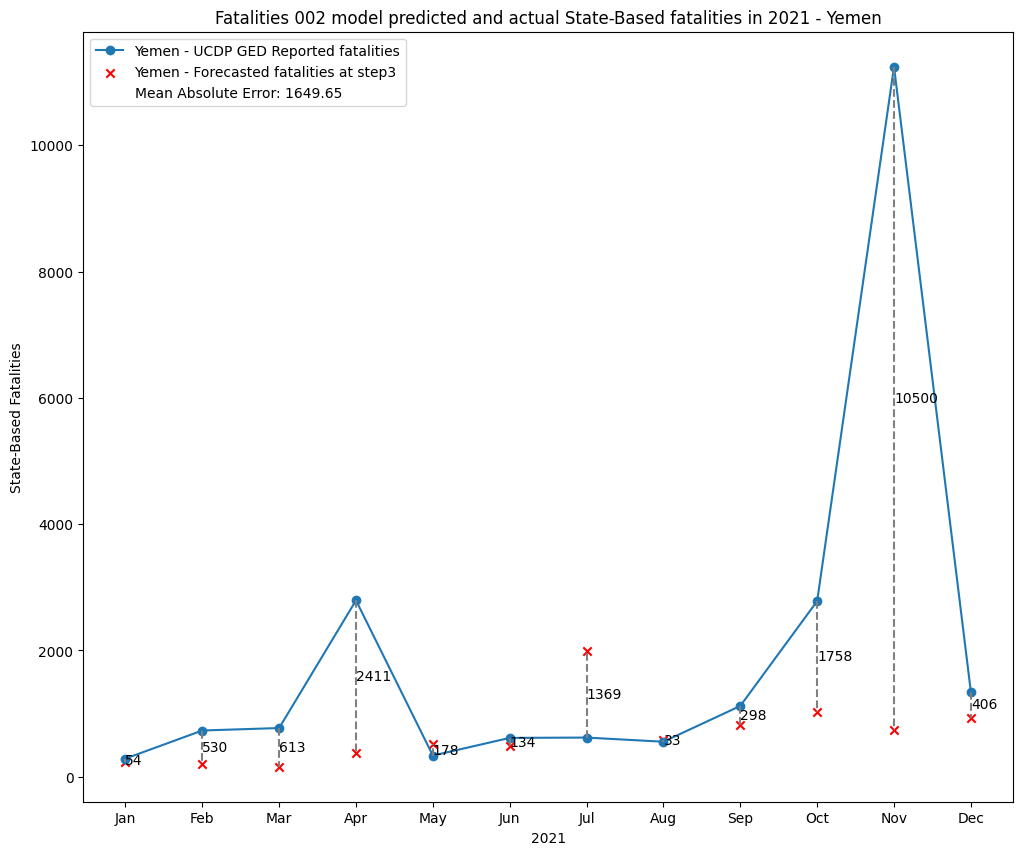

In [9]:
# Countries Kenya, DRC, Nigeria, Somalia, Ethiopia, Burkina Faso, Mali, Niger och något i Middle East? Libanon, Yemen
#237,237,Kenya, 167,167,"Congo, DRC", 79,79,Nigeria, 120,120,Somalia, 57,57,Ethiopia, 47,47,Burkina Faso, 50,50,Mali, 78,78,Niger, 94,94,Lebanon, 124,124,Yemen

countries_to_plot = [(237,'Kenya'), (167,'Congo, DRC'), (79, 'Nigeria'), (120,'Somalia'), (57,'Ethiopia'), (47,'Burkina Faso'), (50,'Mali'), (78,'Niger'), (94,'Lebanon'), (124,'Yemen')]  # Replace 'Country1' and 'Country2' with actual country names

# Define the range of month_ids you want to include
start_month_id = 493
end_month_id = 504
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

month_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Un-log ln_ged_sb_dep values and plot as a line graph
    plt.plot(subset_filtered.index.get_level_values('month_id'), np.expm1(subset_filtered['ln_ged_sb_dep']), label=f'{country_name} - UCDP GED Reported fatalities', marker='o', linestyle='-')
    
    # Adding dots for additional columns within the defined month range
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        # Check if the column exists before attempting to access it
        if column_name in df.columns:
            value = np.expm1(subset.loc[month_id, column_name].iloc[0])  # Un-log the value
            plt.scatter(month_id, value, marker='x', color='red', label='_nolegend_')  # Set the color to red and use '_nolegend_' to exclude from legend
            # Connect the dot with a dashed line to the line graph
            plt.plot([month_id, month_id], [np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0]), value], linestyle='--', color='gray')
            
            # Calculate and display the absolute difference as text next to the dashed line
            diff = np.abs(value - np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0]))
            
            # Conditionally format the text based on the difference value
            if diff < 3:
                plt.text(month_id, (value + np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0])) / 2, f'{diff:.1f}', color='black', ha='left', va='center')
            else:
                plt.text(month_id, (value + np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0])) / 2, f'{diff:.0f}', color='black', ha='left', va='center')

    # Calculate Mean Absolute Error (MAE)
    mae = np.abs(np.expm1(subset_filtered['ln_ged_sb_dep']) - np.expm1(subset_filtered[[f'sc_{month_id - 3}' for month_id in month_ids_to_plot]].iloc[:, 0])).mean()
    
    # Manually add legend entry for the scatter plot and MAE value
    plt.scatter([], [], marker='x', color='red', label=f'{country_name} - Forecasted fatalities at step3')
    plt.plot([], [], linestyle='-', color='white', label=f'Mean Absolute Error: {mae:.2f}')  # White line for spacing
    
    # Customize plot for each country
    plt.title(f'Fatalities 002 model predicted and actual State-Based fatalities in 2021 - {country_name}')
    plt.xticks(month_ids_ticks, month_ticks)
    plt.xlabel('2021')
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    
    #Adjust to your directory of choice 
    plt.savefig(f'{home}/ViEWS Dropbox/VIEWS research collaboration/Outreach/Evaluation_figures/{country_name}.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()